# Comparing PyWGCNA object to gene marker
you can also compare single cell/nucleus gene marker table to pyWGCNA object to deconvolve which cells are driving the changes observed in the previously collected bulk datasets.

## Read PyWGCNA object
First you need to read your PyWGCNa object by `readWGCNA()` function and read gene marker table

In [1]:
import PyWGCNA
pyWGCNA_3xTgAD = PyWGCNA.readWGCNA("3xTgAD_paper/3xTgAD.p")

Reading 3xTgAD WGCNA done!


## Read gene marker list

In [2]:
import pandas as pd
sn_3xTgAD = pd.read_csv("3xTgAD_paper/sn_cluster_3xTgAD.csv", index_col=0)
sn_3xTgAD["cluster"] = "N" + sn_3xTgAD["cluster"].astype(str)
sn_3xTgAD.head(5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,gene_id,cellType
Gm28928,0.0,2.197190,0.579,0.102,0.0,N1,Gm28928,Gm28928,Neuron
ENSMUSG00000059742,0.0,1.902920,0.801,0.227,0.0,N1,Kcnh7,ENSMUSG00000059742,Neuron
ENSMUSG00000028399,0.0,1.887287,0.990,0.528,0.0,N1,Ptprd,ENSMUSG00000028399,Neuron
ENSMUSG00000062991,0.0,1.800752,0.845,0.261,0.0,N1,Nrg1,ENSMUSG00000062991,Neuron
ENSMUSG00000056158,0.0,1.735965,0.599,0.150,0.0,N1,Car10,ENSMUSG00000056158,Neuron


## Comparing PyWGCNA object to single-cell/nucleus gene marker table
After reading the objects and table you only need to call `compareSingleCell()` function on the PyWGCNA object and sn/sc table, you can find the comparison results as a table in `comparison` variable.

In [3]:
modelAD_sn_3xTgAD = PyWGCNA.compareSingleCell(pyWGCNA_3xTgAD, sn_3xTgAD)
modelAD_sn_3xTgAD.comparison

,3xTgAD,single_cell,3xTgAD_size,single_cell_size,number,fraction(%),P_value
0,dimgray,N1,5060,401,83,20.698254,0.124853
1,dimgray,N10,5060,554,172,31.046931,0.000151
2,dimgray,N11,5060,202,98,48.514851,0.0
3,dimgray,N12,5060,216,49,22.685185,0.689378
4,dimgray,N13,5060,44,16,36.363636,0.07501
...,...,...,...,...,...,...,...
708,red,N5,70,46,0,0.0,1.0
709,red,N6,70,65,0,0.0,1.0
710,red,N7,70,116,0,0.0,1.0
711,red,N8,70,22,0,0.0,1.0


## Ploting comparison
You can also plot the comparison result as a confusion matrix by using `plotCompareWGCA()` function.

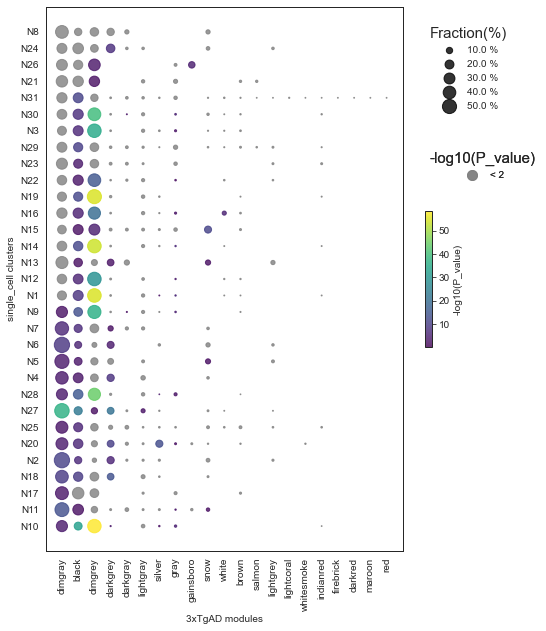

In [5]:
modelAD_sn_3xTgAD.plotComparison(save=True)

## Saving and loading your comparison object
you can save or load your comparison object with saveComparison() or readComparison() function.

In [6]:
modelAD_sn_3xTgAD.saveComparison(name="comparison_sn_3xTgAD")

Saving comparison as comparison_sn_3xTgAD.p


In [1]:
import PyWGCNA
modelAD_sn_3xTgAD = PyWGCNA.readComparison('comparison_sn_3xTgAD.p')

Reading comparison done!
